## 🧩 Paso 1: Cargar y explorar


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv("/datasets/oecd_city_economy.csv")

In [3]:
# mostrar las primeras 5 filas de traffic
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [4]:
# mostrar las primeras 5 filas de eco
eco.head(5)

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos


In [5]:
# Examinar la estructura de traffic
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTCWeekAgo` son de tipo object se tendra que corregir  a tipo datetime,ademas de cambiar el formato al snake_case.
- Las columnas `Country` y	`City` son de tipo float, ademas de cambiar el nombre a minusculas.
- Las columnas `JamsDelay`,	`TrafficIndexLive`,	`JamsLengthInKms`,	`JamsCount`, `TrafficIndexWeekAgo`, `TravelTimeLivePer10KmsMins`, `TravelTimeHistoricPer10KmsMins` y  `MinsDelay`son todos del float	

In [6]:
# Examinar la estructura de eco
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, `City`,	`Country`,	`Unemployment %	PM2.5 (μg/m³)`,	`Population (M)` son del tipo object	
- La columna `Year` es tipo int se debera cambiar a tipo datetime

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.


In [7]:
# Estandarizar los nombres de las columnas de traffic
traffic=traffic.rename(columns={
    "Country":"country",
    "UpdateTimeUTC":"update_time_utc",
    "City":"city",
    'JamsDelay':"jams_delay", 
    'TrafficIndexLive':"traffic_index_live",
    'JamsLengthInKms':"jams_length_kms",
    'JamsCount':"jams_count", 
    'TrafficIndexWeekAgo':"traffic_index_week_ago",
    'UpdateTimeUTCWeekAgo':"update_time_utc_week_ago",
    'TravelTimeLivePer10KmsMins':"travel_time_live_per_10kms_mins",
    'TravelTimeHistoricPer10KmsMins':"travel_time_hist_per_10kms_mins",
    'MinsDelay':"mins_delay"
})

# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins',
       'mins_delay'],
      dtype='object')

In [8]:
# Estandarizar los nombres de las columnas de eco
#tu código aquí
eco=eco.rename(columns={
    'Year':"year",
    'City':"city",
    'Country':"country",
    'City GDP/capita':"city_gbp_capita",
    'Unemployment %':"unemployment_pct",
    'PM2.5 (μg/m³)':"pm25",
    'Population (M)':"population_m"
})
# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gbp_capita', 'unemployment_pct',
       'pm25', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.



In [9]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic["update_time_utc"])
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic["update_time_utc_week_ago"])

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   country                          1004464 non-null  object        
 1   city                             1004464 non-null  object        
 2   update_time_utc                  1004464 non-null  datetime64[ns]
 3   jams_delay                       1004464 non-null  float64       
 4   traffic_index_live               1004464 non-null  float64       
 5   jams_length_kms                  1004464 non-null  float64       
 6   jams_count                       1004464 non-null  float64       
 7   traffic_index_week_ago           1004464 non-null  float64       
 8   update_time_utc_week_ago         1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins  1004464 non-null  float64       
 10  travel_time_hist_per_10kms_min

In [10]:
# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] =eco["city_gbp_capita"].astype(str).str.replace('.','').str.replace(',', '.').astype(float)
eco['unemployment_pct'] =eco["unemployment_pct"].str.replace("%","").str.replace(",",".").astype(float)
eco['population_m'] =eco["population_m"].str.replace(",",".").astype(float)

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco["population_m"]*1000000

# verificar el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gbp_capita   30 non-null     object 
 4   unemployment_pct  30 non-null     float64
 5   pm25              30 non-null     object 
 6   population_m      30 non-null     float64
 7   city_gdp_capita   30 non-null     float64
 8   population        30 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.2+ KB


,year,city,country,city_gbp_capita,unemployment_pct,pm25,population_m,city_gdp_capita,population
0,2023,buenos-aires,Argentina,"15.782,00",6.2,"15,2",15.3,15782.0,15300000.0
1,2023,sao-paulo,Brazil,"14.475,00",9.1,"29,50",22.5,14475.0,22500000.0
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8,"19,10",13.6,13142.0,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.



In [11]:
# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic["update_time_utc"].dt.year

# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [12]:
# Filtra los registros del año 2024
traffic_2024 = traffic[traffic["year"]==2024].copy()
eco_2024 = eco[eco["year"]==2024].copy()

# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gbp_capita,unemployment_pct,pm25,population_m,city_gdp_capita,population
15,2024,buenos-aires,Argentina,"18.117,00",7.2,"14,50",15.4,18117.0,15400000.0
16,2024,sao-paulo,Brazil,"14.703,00",8.5,"28,00",22.6,14703.0,22600000.0
17,2024,rio-de-janeiro,Brazil,"13.349,00",9.2,"18,40",13.7,13349.0,13700000.0
18,2024,brasilia,Brazil,"16.251,00",7.8,"12,80",4.8,16251.0,4800000.0
19,2024,salvador,Brazil,"8.899,00",12.4,"15,20",3.9,8899.0,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad




In [13]:
# Calcular los  promedios de trafico por ciudad, país y año
columns_metric=["jams_delay",
                "traffic_index_live",
                "jams_length_kms",
                "jams_count",
                "mins_delay",
                "travel_time_live_per_10kms_mins",
                "travel_time_hist_per_10kms_mins"]
traffic_city_year_2024 = traffic_2024.groupby(["city","country","year"])[columns_metric].agg("mean").reset_index()

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


In [14]:
 traffic_city_year_2024.sort_values(["jams_delay"],ascending=False)

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es la ciudad de mexico (mexico-city)


---

## 🧩Paso 5: Unir movilidad y economía



In [22]:
# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_kms','jams_count','mins_delay',
             'travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm25','population']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# Unir datasets
merged = pd.merge(traffic_2024_small,eco_2024_small,on=["city","year"],how="inner")

# Mostrar las primeras 5 filas
merged.head(5)

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,city_gdp_capita,unemployment_pct,pm25,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,11124.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,11442.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,16251.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,18117.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,12381.0,8.2,"13,50",3700000.0


---

## 🧩Paso 6: Visualización y análisis de relaciones


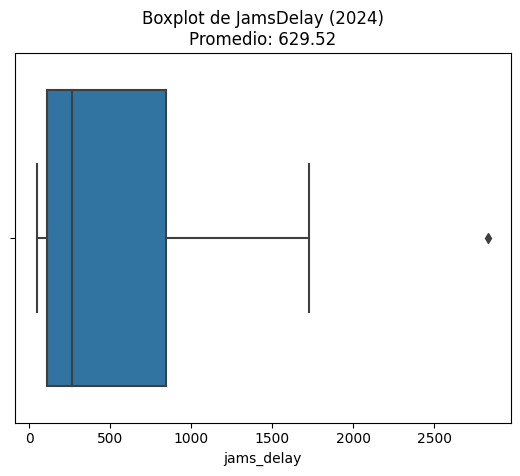

In [16]:

# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico
sns.boxplot(data=merged,x="jams_delay")
# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()



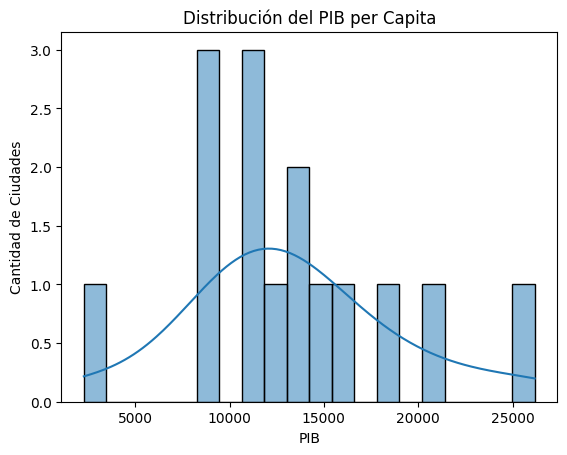

In [27]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
sns.histplot(data=merged,x="city_gdp_capita",kde=True,bins=20)

#edicion del grafico
plt.title("Distribución del PIB per Capita")
plt.xlabel("PIB")
plt.ylabel("Cantidad de Ciudades")
plt.show()

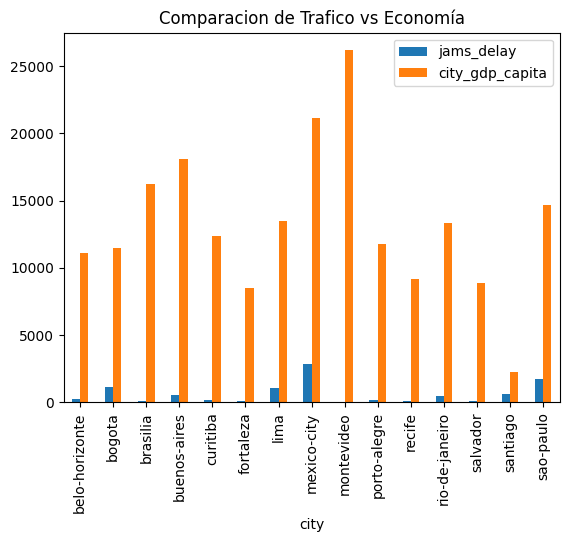

In [33]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
merged.plot( x="city",kind="bar", y=['jams_delay', 'city_gdp_capita'])
plt.title("Comparacion de Trafico vs Economía")
plt.xticks(rotation=90)
plt.show()

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

Escribe tus comentarios: Con excepcion de montevideo, al paracer las ciudades con mas PIB per capita son las que representan mas congestion, pero no hay una relación clara

In [34]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)